In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
UA, UB = 6, 0.6
a, b = 0.1, 0.8
l = b - a
T = 14
tau = 0.05
h = 0.1


def k(x):
    return x


def phi(x, UA, UB, a, b):
    return ((UB - UA) * (x - a)) / (b - a) + UA


def f(x):
    return x + x ** (1 / 3)


def apply_boundary_conditions(u, UA, UB, n):
    u[n + 1, 0] = UA
    u[n + 1, -1] = UB

In [72]:
def get_solution(a, b, UA, UB, h, tau, T, phi, k, f, apply_boundary_conditions):
    x = np.arange(a, b + h, h)
    t = np.arange(0, T + tau, tau)

    u = np.zeros((len(t), len(x)))
    u[0, :] = phi(x, UA, UB, a, b)

    for n in range(0, len(t) - 1):
        for i in range(1, len(x) - 1):
            k_right = k(x[i + 1])
            k_middle = k(x[i])
            k_left = k(x[i - 1])

            u[n + 1, i] = u[n, i] + tau * (
                    ((k_right - k_left) * (u[n, i + 1] - u[n, i - 1])) / (4 * h ** 2) +
                    k_middle * ((u[n, i + 1] - 2 * u[n, i] + u[n, i - 1]) / (h ** 2)) +
                    f(x[i]) * (1 - np.exp(-t[n]))
            )

        apply_boundary_conditions(u, UA, UB, n)

    return u, x

In [73]:
u, x = get_solution(a, b, UA, UB, h, tau, T, phi, k, f, apply_boundary_conditions)

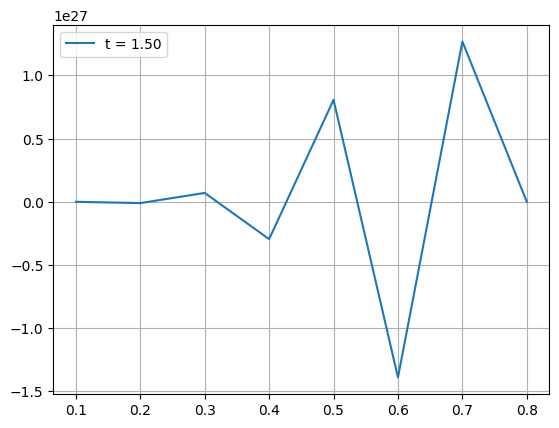

In [88]:
times_to_plot = [0.5 * tau, 10 * tau, 20 * tau]
times_to_plot = [30 * tau]
for t in times_to_plot:
    n = int(t / tau)
    plt.plot(x, u[n, :], label=f't = {t:.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
u, x = get_solution(a, b, UA, UB, h, tau, T, phi, k, f, apply_boundary_conditions)
for n in range(u.shape[0]):
    # n = int(t / tau)
    t = n * tau
    plt.plot(x, u[n, :])
    plt.title(f't = {t:.2f}')
    plt.grid(True)
    
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.savefig(f'for_gif/{t:.6f}.png')
    plt.close()

In [94]:
# создание gif

import imageio
import os

image_folder = 'for_gif'
gif_path = 'animation.gif'

images = []
for file_name in sorted(os.listdir(image_folder), reverse=True):
    if file_name.endswith('.png'):
        file_path = os.path.join(image_folder, file_name)
        images.append(imageio.imread(file_path))
        
imageio.mimsave(gif_path, images, duration=0.5)

/var/folders/nr/0_xrsq994hj6_tw7mg66z3vw0000gn/T/ipykernel_63089/856822187.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
